In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

# inline plots
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

## 1. Loading Cifar Data


In [18]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

batch_size = 128
nb_classes = 10
nb_epoch = 100

# input image dimensions
img_rows, img_cols = 32, 32
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [19]:
print ("train size ",X_train.shape)
print ("")

train size  (50000, 3, 32, 32)



In [20]:
y_train[0]


array([6], dtype=uint8)

Visualize Cifar Dataset

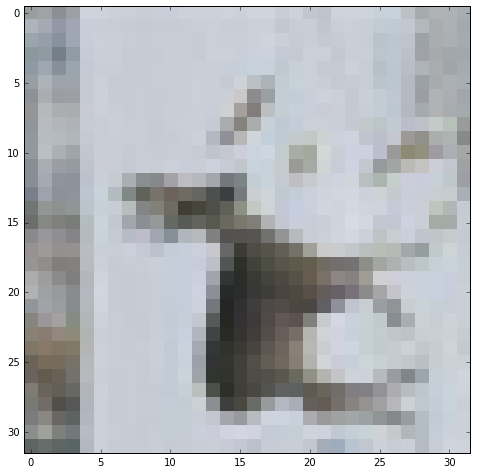

In [21]:
plt.imshow(X_train[20].transpose(), cmap='gray')

## Loading Terraza Buildings

In [28]:
import os
import glob
import cv2
import pandas as pd

def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    # Reduce size
    resized = cv2.resize(img, (128, 96))
    return resized

def load_data(train_path,test_path):
    X_train = []
    y_train = []
    print('Read train images')
     #set the path for the filenames
    files = os.listdir(train_path)
    for fl in files:
        img = get_im(fl)
        X_train.append(img)
 
    y_train = pd.read_csv(test_path, header=None, delimiter=r"\s+")
    return X_train, y_train.values


train_path = '/Users/and_ma/Documents/DataScience/UPC_DLC/DL_ProjectGithub/DataSets/TerrassaBuildings900/train/images/'
test_path = '/Users/and_ma/Documents/DataScience/UPC_DLC/DL_ProjectGithub/DataSets/TerrassaBuildings900/train/annotation.txt'
train_data= load_data(train_path);          
train_labels = load_data(test_path)

val_data= load_data('/Users/and_ma/Documents/DataScience/UPC_DLC/DL_ProjectGithub/DataSets/TerrassaBuildings900/val/images/');          
val_labels = load_data('/Users/and_ma/Documents/DataScience/UPC_DLC/DL_ProjectGithub/DataSets/TerrassaBuildings900/val/annotation.txt')



ImportError: No module named 'cv2'

In [22]:
def create_model():
    model = Sequential()
    model.add(Convolution2D(32, nb_conv, nb_conv,
                            border_mode='valid',
                            activation='relu',
                            input_shape=(3, img_rows, img_cols),
                            name='conv1_1'))
    model.add(Convolution2D(32, nb_conv, nb_conv, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool), name='pool1'))
    model.add(Convolution2D(64, nb_conv, nb_conv, activation='relu', name='conv2'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool), name='pool2'))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', name='fc1'))
    model.add(Dense(nb_classes, activation='softmax', name='output'))
    return model

def train(model):   
    #model = create_model()
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy']) 
    checkpointer = ModelCheckpoint(filepath="task4_New_weights.hdf5", verbose=1, save_best_only=True)
    model.fit(X_train, y_train, nb_epoch=20, batch_size=16, show_accuracy=True, validation_split=0.2, verbose=2, callbacks=[checkpointer])

def load_trained_model(weights_path):
    model = create_model()
    model.load_weights(weights_path)
#check path    
weights_path= "/Users/and_ma/Documents/DataScience/UPC_DLC/DL_ProjectGithub/dlcv01/weights.hdf5"

model = load_trained_model(weights_path)
train(model)

ValueError: Shapes (32, 3, 3, 3) and (32, 1, 3, 3) are not compatible